# soundmax

* выбрать нижнюю границу частоты, верхнюю границу частоты и шаг вычисления гистограммы (в долях октавы)
* построить верхнюю границу гистограммы за n периодов дискретизации (возможно, имеер смысл осреднять значения за некий период)
* найти левый локальный максимум, отступить от него влево на случайное число октав так, чтобы базовая частота пентотоники оказалась между 77 и 333 Гц
* случайно выбрать размах пентатоники в диапазоне 1..4 октавы (допускаются нецелые значения (уточнить))
* по истечении периода смены базовой частоты (16..37 секунд) повторить формирование

In [1]:
import numpy as np
f = 600  # длина отрезка потока, на котором строится гистограмма
n = 4  # число f-ов для осреднения гистограммы
a = np.zeros((f * n, 1))
for i in range(300):  # поток данных укладываем в матрицу нужного размера, сдвигая имеющиеся данные и выбрасывая самые старые данные
    s = np.random.uniform(-1, 1, np.random.randint(1, 10))  # имитация показаний датчика звукового давления
    a = np.roll(a, len(s))
    np.put(a, np.arange(len(s)), s)
a = a.reshape(n, f)
print(a)

[[ 0.84766216 -0.99685986 -0.22754859 ...  0.33129108 -0.27692807
   0.27102641]
 [-0.49940702  0.16849332  0.76237133 ... -0.78363305  0.22824343
  -0.65512795]
 [-0.5476989   0.96859312 -0.90849344 ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]


In [2]:
import matplotlib.pyplot as plt

count, bins, ignored = plt.hist(a[0], 15, density=True)
plt.plot(bins, np.ones_like(bins) * 0.2, linewidth=2, color='r')
#plt.show()

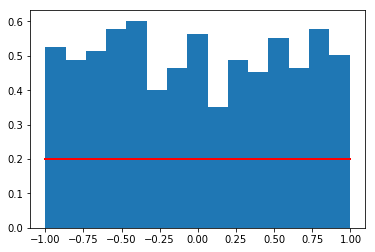

In [3]:
count, bins, ignored = plt.hist(a[1], 15, density=True)
plt.plot(bins, np.ones_like(bins) * 0.2, linewidth=2, color='r')
plt.show()

# test 2

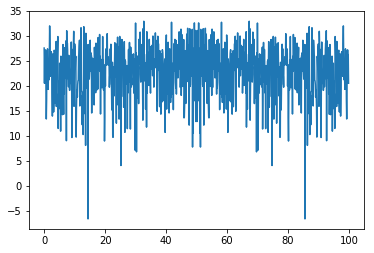

In [4]:
import scipy
fs = 100
N = fs * 10
x = np.random.uniform(-1, 1, N)
X = scipy.fft(x)
Xdb = 20*scipy.log10(scipy.absolute(X))
f = scipy.linspace(0, fs, N, endpoint=False)

import pylab
pylab.plot(f, Xdb)

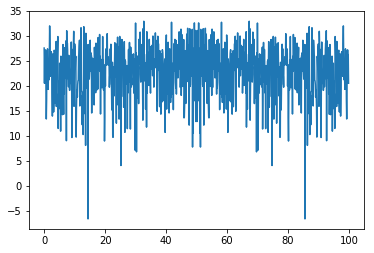

In [5]:
import pylab
pylab.plot(f, Xdb)

E:\lshapov\programs\anaconda3\lib\site-packages\numpy\core\numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


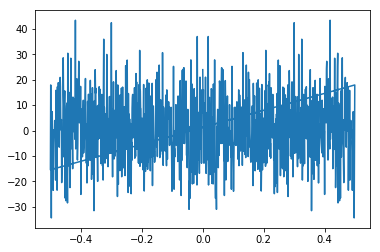

In [6]:
spec = np.fft.fft(x)
freq = np.fft.fftfreq(len(x))
plt.plot(freq, spec)

In [7]:
import scipy.io.wavfile
bitrate, data = scipy.io.wavfile.read('Windows Logon.wav')

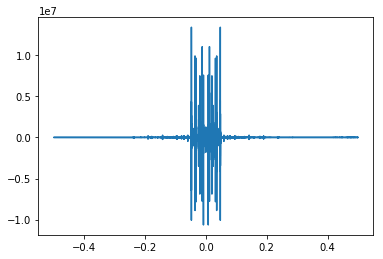

In [25]:
spec = np.fft.fft(data.T[0])
freq = np.fft.fftfreq(len(data))
plt.plot(freq, spec)

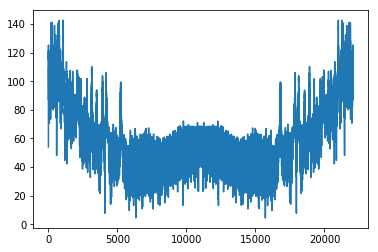

In [24]:
X = scipy.fft(data.T[0])
Xdb = 20*scipy.log10(scipy.absolute(X))
f = scipy.linspace(0, bitrate, len(data), endpoint=False)

import pylab
pylab.plot(f, Xdb)

In [19]:
import scipy.signal
f, Pxx_den = scipy.signal.welch(data.T[0], bitrate, nperseg=80)

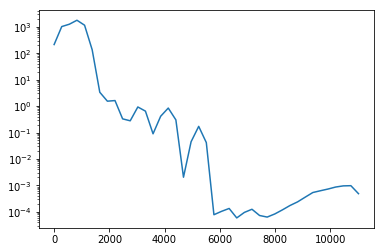

In [20]:
plt.semilogy(f, Pxx_den)

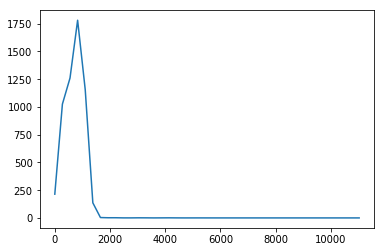

In [21]:
plt.plot(f, Pxx_den)

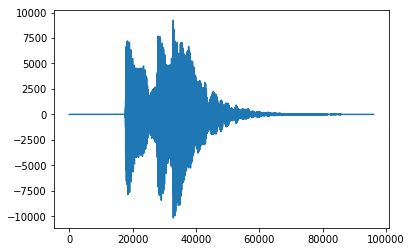

In [23]:
plt.plot(data.T[0])

In [ ]:
f, Pxx_den = scipy.signal.welch(x)
plt.semilogy(f, Pxx_den)